In [9]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from src.eval import Study

In [2]:
DATA_DIR = Path("data")

In [3]:
contender_dirs = [d for d in DATA_DIR.iterdir() if d.is_dir()]
studies = [Study.load(data_dir=d, name=d.name) for d in contender_dirs]

In [7]:
%matplotlib widget

/opt/homebrew/Caskroom/miniforge/base/envs/rl4aa25-tutorial/lib/python3.12/site-packages/ipympl/backend_nbagg.py:335: UserWarning: Glyph 956 (\N{GREEK SMALL LETTER MU}) missing from font(s) cmr10.
  self.figure.savefig(buf, format='png', dpi='figure')


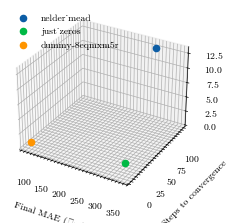

In [8]:
# 3D scatter plot of
# print(f"Final MAE: {study.median_final_mae() * 1e6:.0f} μm")
# print(f"Steps to convergence: {study.median_steps_to_convergence(threshold=4e-5)}")
# print(f"Sum of magnet changes: {study.median_sum_of_normalized_magnet_changes():.2f}")

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for study in studies:
    ax.scatter(
        study.median_final_mae() * 1e6,
        study.median_steps_to_convergence(threshold=4e-5),
        study.median_sum_of_normalized_magnet_changes(),
        label=study.name,
    )

ax.set_xlabel("Final MAE (μm)")
ax.set_ylabel("Steps to convergence")
ax.set_zlabel("Sum of normalized magnet changes")
ax.legend()
plt.show()

In [11]:
df = pd.DataFrame(
    [
        {
            "name": study.name,
            "final_mae": study.median_final_mae() * 1e6,
            "steps_to_convergence": study.median_steps_to_convergence(threshold=4e-5),
            "sum_of_normalized_magnet_changes": study.median_sum_of_normalized_magnet_changes(),
        }
        for study in studies
    ]
)

df["score"] = (
    df["final_mae"] / 4_000
    + df["steps_to_convergence"] / 150
    + df["sum_of_normalized_magnet_changes"] / (5 * 150)
)

df.sort_values("score")

,name,final_mae,steps_to_convergence,sum_of_normalized_magnet_changes,score
2,dummy-8eqmxm5r,74.488274,3.0,0.650102,0.039489
1,just_zeros,341.729950,1.0,2.493611,0.095424
0,nelder_mead,280.875122,115.5,12.706206,0.857160
